[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1SNpLrEVeM7-Go18y99J9jaosECpHQ7g2)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [3]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column
    x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [4]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [51]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

# Read in validation data
xvalid, yvalid = read_data('wine_validation.txt')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [43]:
x1

array([[ 1.51762786, -0.38691813,  0.22823413, ...,  2.14525874,
         0.82825326,  1.        ],
       [ 0.38842415, -0.31017041, -0.78072772, ...,  0.94330362,
         0.78650382,  1.        ],
       [ 0.34457158,  0.32573923,  1.06323704, ...,  0.41166963,
         1.16224879,  1.        ],
       ...,
       [-1.15737899,  0.07356817,  1.44594671, ..., -1.27569044,
        -0.83894111,  1.        ],
       [-0.5215167 , -0.4746298 , -0.22405912, ..., -0.48979671,
        -1.18406983,  1.        ],
       [-0.88330042,  2.45274734,  0.05427519, ..., -0.97520166,
        -0.52164536,  1.        ]])

In [50]:
from typing_extensions import NewType
def loss(X, Y, w, lambd):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    return np.sum(np.log(1 + np.exp(-Y * np.dot(X, w)))) / len(Y)


def gradient(x, y, w, lambd, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to w.
    '''

    return -y * x / (1 + np.exp(y * np.dot(x, w))) + 2 * lambd / N * w

def SGD(X, Y, w_start, eta, N_epochs, lambd):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    curr_weight = w_start
    for i in range(0, N_epochs):
      epoch = np.random.permutation(X.shape[0])
      X = X[epoch]
      Y = Y[epoch]

      for n in range(X.shape[0]):
        curr_weight = curr_weight - eta * gradient(X[n], Y[n], curr_weight, lambd, len(X))


    return curr_weight

In [52]:

x1 = x1[:,:13]
x2 = x2[:,:13]

mean1 = np.mean(x1, axis = 0)
std1 = np.std(x1, axis = 0)
x1 = (x1 - mean1) / std1

mean2 = np.mean(x2, axis = 0)
std2 = np.std(x2, axis = 0)
x2 = (x2 - mean2) / std2

x1 = np.append(x1, np.ones((x1.shape[0], 1)), axis = 1)
x2 = np.append(x2, np.ones((x2.shape[0], 1)), axis = 1)

array([[ 1.51762786, -0.38691813,  0.22823413, ...,  2.14525874,
         0.82825326,  1.        ],
       [ 0.38842415, -0.31017041, -0.78072772, ...,  0.94330362,
         0.78650382,  1.        ],
       [ 0.34457158,  0.32573923,  1.06323704, ...,  0.41166963,
         1.16224879,  1.        ],
       ...,
       [-1.15737899,  0.07356817,  1.44594671, ..., -1.27569044,
        -0.83894111,  1.        ],
       [-0.5215167 , -0.4746298 , -0.22405912, ..., -0.48979671,
        -1.18406983,  1.        ],
       [-0.88330042,  2.45274734,  0.05427519, ..., -0.97520166,
        -0.52164536,  1.        ]])

In [53]:
xvalid1 = xvalid[:,:13]
xvalid2 = xvalid[:,:13]

xvalid1 = (xvalid1 - mean1) / std1
xvalid2 = (xvalid2 - mean2) / std2

xvalid1 = np.append(xvalid1, np.ones((xvalid1.shape[0], 1)), axis = 1)
xvalid2 = np.append(xvalid2, np.ones((xvalid2.shape[0], 1)), axis = 1)

In [54]:
eta = 5e-4
n_epoch = 20000
lambdas = [.00001 * 5 ** n for n in range(15)]
w_start = np.random.rand(14)


In [55]:
train1 = []
train2 = []

test1 = []
test2 = []

norm1 = []
norm2 = []

iter = 1

for l in lambdas:
  print(iter)
  iter += 1
  w1 = SGD(x1, y1, w_start, eta, n_epoch, l)
  w2 = SGD(x2, y2, w_start, eta, n_epoch, l)

  train1.append(loss(x1, y1, w1, l))
  train2.append(loss(x2, y2, w2, l))

  test1.append(loss(xvalid1, yvalid, w1, l))
  test2.append(loss(xvalid2, yvalid, w2, l))

  norm1.append(np.linalg.norm(w1))
  norm2.append(np.linalg.norm(w2))





1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


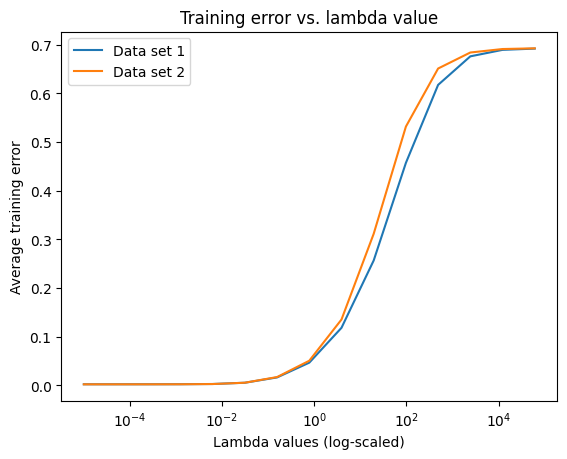

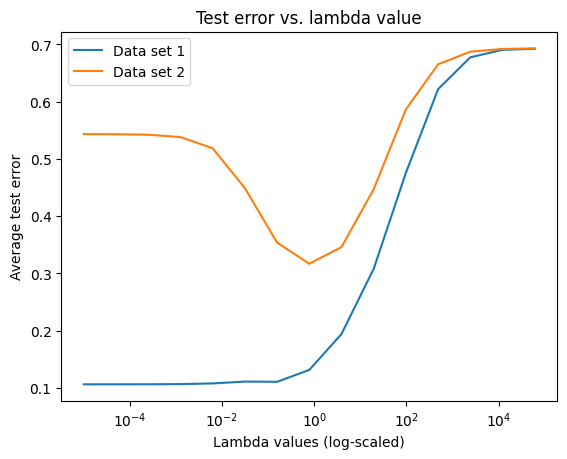

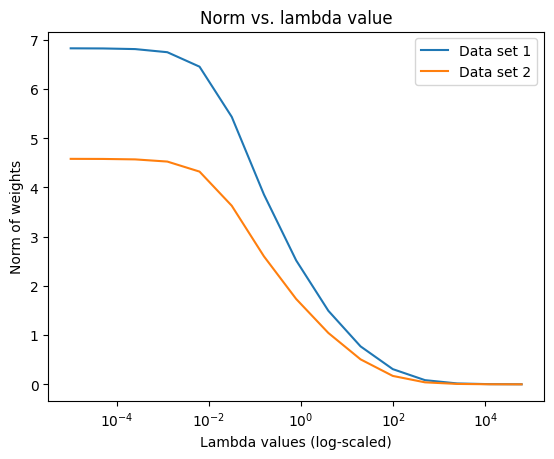

In [57]:
plt.figure()

plt.plot(lambdas, train1, label = "Data set 1")
plt.plot(lambdas, train2, label = "Data set 2")
plt.xscale('log')

plt.title("Training error vs. lambda value")
plt.ylabel("Average training error")
plt.xlabel("Lambda values (log-scaled)")

plt.legend(loc = "best")

plt.show()

plt.figure()

plt.plot(lambdas, test1, label = "Data set 1")
plt.plot(lambdas, test2, label = "Data set 2")
plt.xscale('log')

plt.title("Test error vs. lambda value")
plt.ylabel("Average test error")
plt.xlabel("Lambda values (log-scaled)")

plt.legend(loc = "best")

plt.show()

plt.figure()

plt.plot(lambdas, norm1, label = "Data set 1")
plt.plot(lambdas, norm2, label = "Data set 2")
plt.xscale('log')

plt.title("Norm vs. lambda value")
plt.ylabel("Norm of weights")
plt.xlabel("Lambda values (log-scaled)")

plt.legend(loc = "best")

plt.show()

In [61]:
random_numbers = np.random.normal(loc=1, scale=2, size=10000)

In [64]:
Y = .5 * random_numbers - .5

In [66]:
print(np.var(Y))

1.0136629259599346
